**BUILDING A QUANTUM ARTIFICIAL INTELLIGENCE MODEL:**

A quantum AI model is the one that leverages the principles of quantum computing to enhance or optimize the performance of traditional AI algorithms.

Deep learning is a subfield of artificial intelligence which is all about training the neural networks i.e., using the data to get the right values for each neuron to be able to predict what we want.
Training deep learning AI systems requires massive amounts of data and computational power. This can take minutes to weeks and in the process, it consumes a lot of energy and computational resources.Quantum computing is one of the solution to this problem related to better coomputational efficiency.

Here is a quantum AI model which solves one of the most famous problem in quantum chemistry: The lowest energy level or the ground state energy of H2 molecule which is the most stable state!

But what is the significance of finding the ground state energy:

1. Stability: Ground state represents the most stable configuration of the system and finding this would help us understand and predict the behaviour,stability and reactivity of the molecules.

2. Drug design: In drug discovery knowing the ground state of molecules helps in understanding how drugs interact with biological targets, leading to more effective treatments.

3. Properties of materials: The ground state determines many properties of materials, such as electrical conductivity, magnetism, and superconductivity. Understanding the ground state can lead to the design of new materials with desirable properties.

4. Quantum Optimization: Many optimization problems can be framed as finding the ground state of a corresponding quantum system. The energy landscape of the system represents the solution space, and the ground state corresponds to the optimal solution.

What are the challenges in finding the ground state energy:

1. The state of a quantum system is described by a wavefunction, which resides in a high-dimensional space called Hilbert space. The size of this space grows exponentially with the number of particles or degrees of freedom in the system, making it extraordinarily difficult to explore and find the ground state using classical methods.

2. The energy landscape of a quantum system can be extremely complex, with many local minimas. Finding the global minimum (ground state) is challenging because algorithms can easily get trapped in these local minima.

With quantum computing, the qubits represent electrons, which can directly simulate the electrons in the molecules.

VQE (Variational Quantum Algorithm) which is a hybrid algorithm that leverages both the properties of classsical and quantum computing is used to find the ground state energy of H2 molecule. The code is designed to run on a quantum simulator (which is a classical computer running a quantum algorithm).






In [1]:
pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.4 MB/s eta 0:00:00


In [16]:
#importing libraries:

import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

Using quantum mechanics, the ground state energy is found by solving the using the schrodinger's equation:
HΨ=EΨ
Hence the primary step is about defining the hamiltonian of the H2 molecule. The hamiltonian incorporates the kinetic energy of the electrons, the potential energy due to electron-nucleus attractions, electron-electron repulsions, and nucleus-nucleus repulsions.

The bond length of hydrogen in an H2 molecule is 0.74 angstroms (Å).
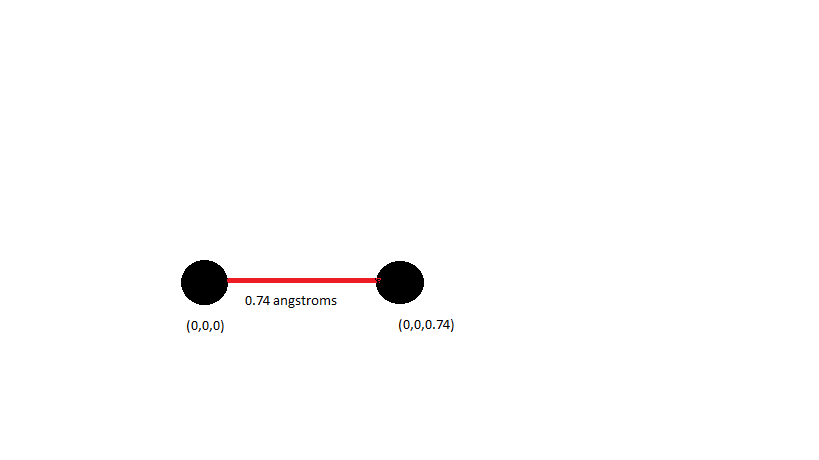



In [8]:
#defining the molecule
symbols=["H","H"] #molecule consists of two hydrogen molecules
coordinates=np.array([0.0,0.0,0.0,0.0,0.0,0.74]) #first hydrogen at origin and second hydrogen at 0.74 angstroms on the z-axis away from the origin
print(coordinates)
#generating the hamiltonian:
hamiltonian, qubits = qml.qchem.molecular_hamiltonian(symbols,coordinates) #hamiltonian represents the energy of the system.
#qubits represents the number of quantum bits needed to simulate the molecule (Using the Jordan-Wigner or Bravyi-Kitaev transformation, each spin-orbital requires one qubit.)
#hence for two atoms which has got 4 spin orbitals in total, the no. of qubits=4

[0.   0.   0.   0.   0.   0.74]


An ansatz is a parametrized quantum circuit designed to prepare a trial quantum state. The parameters of the ansatz are adjusted to minimize the expectation value of the Hamiltonian, which corresponds to finding the ground state energy of the system. We then initialize the basis state as |0000> and in the context of the H2 molecule, starting from a specific basis state ensures that the ansatz begins from a known reference state, typically the ground state in the computational basis for each qubit.

In [30]:
#defining the device:
dev = qml.device("default.qubit", wires=qubits)
#defining the ansatz (the variational quantum circuit): this ckt is used to find the ground state energy of the molecule.
def ansatz(params, wires):
    qml.BasisState(np.array([0] * qubits), wires=wires)
 #This line initializes the quantum register in a specific basis state, here the state |0000> if qubits=4
    for i in range(qubits):
        qml.RY(params[i], wires=wires[i]) #This loop applies a rotation around the Y-axis to each qubit.
    for i in range(qubits - 1):
        qml.CNOT(wires=[wires[i], wires[i + 1]]) #This loop applies Controlled-NOT (CNOT) gates between consecutive qubits, entangling them.


Here, the purpose of applying the RY and CNOT gates is as follows:
1. Create Superpositions: The RY gates rotate the qubit states around the Y-axis on the Bloch sphere. This rotation creates superpositions of the computational basis states (e.g., |0⟩ and |1⟩).

2. Parameterization: The angle of rotation (params[i]) is a parameter that is optimized during the VQE process. Adjusting these parameters changes the quantum state of the system.

3. Exploring the Hilbert Space: The quantum state prepared by these rotations can explore different regions of the Hilbert space. The goal is to find a state that minimizes the expectation value of the Hamiltonian, representing the ground state.

4. The CNOT gates create entanglement between consecutive qubits. Entanglement is a key feature in quantum mechanics where the states of qubits become correlated.

5. Correlated States: In many quantum systems, especially those involving multiple particles or electrons, the quantum state is not just a product of individual qubit states but rather a complex, entangled state.

6. Accurate Ground State Representation: Without entanglement, the ansatz would be limited to separable states (i.e., states that are simply products of individual qubit states), which might not capture the true ground state of the system. Including CNOT gates ensures that the ansatz can represent entangled states, leading to a more accurate approximation of the ground state.




In [31]:
#defining cost function:
@qml.qnode(dev)  #his line is a decorator that transforms the cost_fn function into a quantum node, allowing it to run on the quantum device dev.
def cost_fn(params):
    ansatz(params, wires=range(qubits))
    return qml.expval(hamiltonian)
np.random.seed(42) #fixed seed for reproducibility
# Initialize parameters with numpy
qubits = 4
params = np.random.rand(qubits)

# Convert numpy array to PennyLane tensor with requires_grad
params = qml.numpy.array(params, requires_grad=True)

# Choose an optimizer
optimizer = qml.GradientDescentOptimizer(stepsize=0.4)
#This line creates an optimizer that will adjust the parameters to minimize the cost function. Specifically, it uses gradient descent with a step size of 0.4.
#step size= the number of steps required to reach the minimum
#A larger step size allows the optimizer to make more significant updates to the parameters, potentially leading to faster progress initially.
#Smaller step sizes lead to smaller updates to the parameters, which means the optimizer makes slower progress toward the minimum.

A cost function, also known as an objective function,measures how well a given solution or set of parameters perform with respect to the goal of the optimization problem.In algorithms like VQE, the cost function often refers to the expectation value of a Hamiltonian, which represents the energy of the quantum state prepared by the variational ansatz.

A parameterized quantum circuit (ansatz) is used to prepare a trial quantum state. The parameters in this circuit are adjusted to explore different quantum states. The Hamiltonian of the quantum system is an operator that represents the total energy of the system. To find the ground state energy, we need to compute the expectation value of this Hamiltonian for the trial quantum state prepared by the ansatz. The cost function in VQE is defined as the expectation value of the Hamiltonian with respect to the quantum state prepared by the ansatz. The parameters 𝜃 are optimized to minimize the cost function. This process involves varying the parameters to find the values that give the lowest expectation value of the Hamiltonian, which corresponds to the ground state energy.

In [32]:
#Optimization loop:
# Number of optimization steps
max_iterations = 100 #This sets the maximum number of steps the optimization will take. In this case, it is 100 steps.
conv_tol = 1e-06 #This defines the convergence tolerance. If the change in energy between steps is less than this value, the optimization will stop.

# Optimization loop
energies = [] #This initializes an empty list to store the energies calculated at each step.

for n in range(max_iterations): #This starts a loop that will run up to max_iterations times.
    params, prev_energy = optimizer.step_and_cost(cost_fn, params)
    #The above line performs one step of optimization. It updates the parameters and returns the new parameters and the previous energy.

    energy = cost_fn(params) # This calculates the current energy using the updated parameters.
    energies.append(energy) #This adds the current energy to the energies list.
    if np.abs(energy - prev_energy) < conv_tol:
        break
#This checks if the absolute difference between the current energy and the previous energy is less than the convergence tolerance. If it is, the loop stops early because the optimization has converged.
    print(f"Step = {n}, Energy = {energy:.8f} Ha")
# This prints the current step number and the energy in Hartree (Ha) to eight decimal places.
print(f"Final ground state energy = {energy:.8f} Ha")
#After the loop, this prints the final ground state energy.


Step = 0, Energy = 1.40040436 Ha
Step = 1, Energy = 1.39377357 Ha
Step = 2, Energy = 1.38602898 Ha
Step = 3, Energy = 1.37688214 Ha
Step = 4, Energy = 1.36595377 Ha
Step = 5, Energy = 1.35274042 Ha
Step = 6, Energy = 1.33657169 Ha
Step = 7, Energy = 1.31655916 Ha
Step = 8, Energy = 1.29154373 Ha
Step = 9, Energy = 1.26006129 Ha
Step = 10, Energy = 1.22037054 Ha
Step = 11, Energy = 1.17062226 Ha
Step = 12, Energy = 1.10927724 Ha
Step = 13, Energy = 1.03584026 Ha
Step = 14, Energy = 0.95177135 Ha
Step = 15, Energy = 0.86105933 Ha
Step = 16, Energy = 0.76974278 Ha
Step = 17, Energy = 0.68420726 Ha
Step = 18, Energy = 0.60918981 Ha
Step = 19, Energy = 0.54677922 Ha
Step = 20, Energy = 0.49675027 Ha
Step = 21, Energy = 0.45755201 Ha
Step = 22, Energy = 0.42720211 Ha
Step = 23, Energy = 0.40380829 Ha
Step = 24, Energy = 0.38577584 Ha
Step = 25, Energy = 0.37184079 Ha
Step = 26, Energy = 0.36103130 Ha
Step = 27, Energy = 0.35261019 Ha
Step = 28, Energy = 0.34602081 Ha
Step = 29, Energy = 0.34

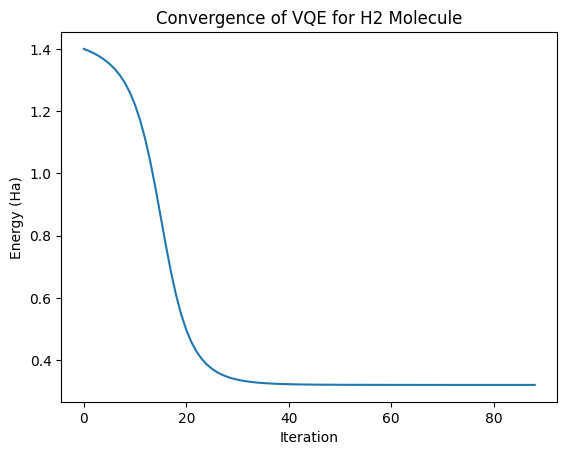

In [27]:
# Visualize the results
iterations = range(len(energies))

plt.plot(iterations, energies)
plt.xlabel('Iteration')
plt.ylabel('Energy (Ha)')
plt.title('Convergence of VQE for H2 Molecule')
plt.show()